# Atividade 3

Faça tudo via dbt. 

Envia como resposta:
- A query SQL
- Comando utilizado via terminal no `dbt`
- Um print do resultado no próprio notebook, para isso é necessário criar uma pasta no repositório onde serão armazenadas as imagens, e para inserir no notebook é necessário criar uma célula `markdown` e inserir o seguinte comando: 

```markdown
![Nome da Foto](path/para/imagem)
```

1. Crie uma tabela `orders_by_year` a partir de `orders` que agrupa a quantidade de pedidos por ano, considerando a coluna `order_approved_at`

```sql
{{ config(materialized='table') }}

SELECT
    EXTRACT(YEAR FROM order_approved_at) as order_approved_year,
    COUNT(order_id) as
FROM
    `dbt_shop_maykon.orders_by_year`

GROUP BY
    EXTRACT(YEAR FROM order_approved_at)
```


``dbt run --models shop.questao01``

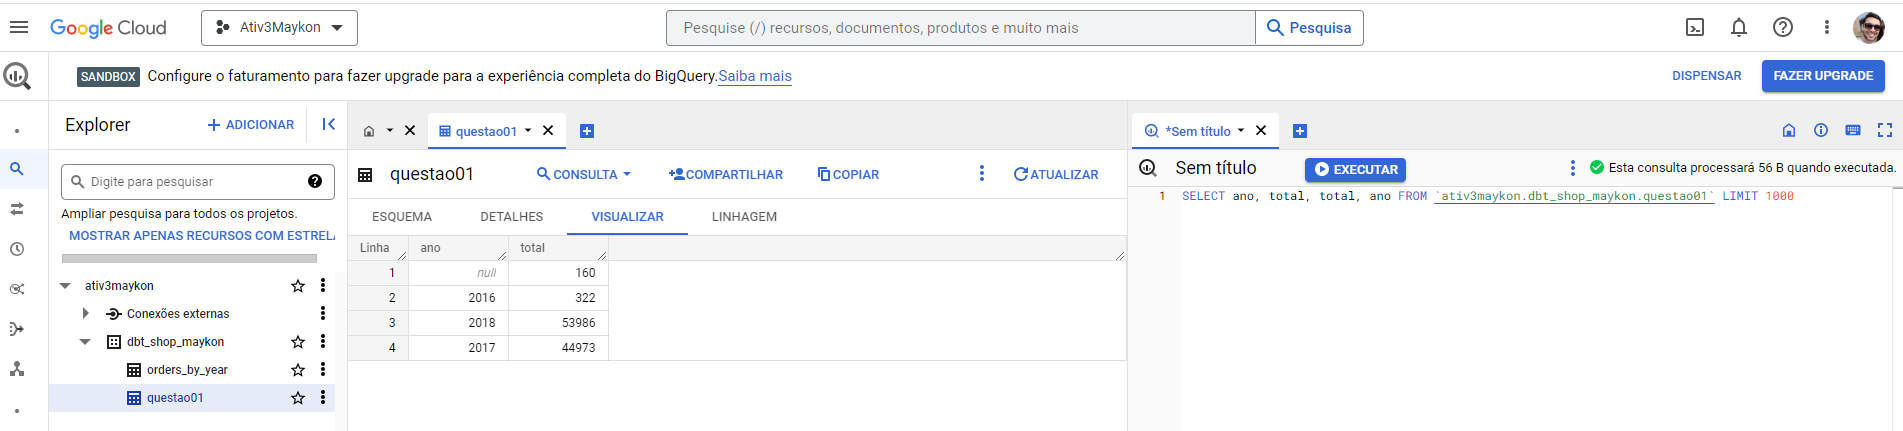

2. Crie uma `view` que agrega os totais de pedidos por estado. Considere as tabelas _customers_ para obter os estados (coluna _customer_state_) e _orders_ para contabilizar a quantidade de pedidos.

```sql
{{ config(materialized='view') }}

SELECT
    customers.customer_state as estado,
    count(orders_by_year.order_id) as total
FROM
    `dbt_shop_maykon.orders_by_year` as orders_by_year
INNER JOIN
    `dbt_shop_maykon.customers` as customers 
ON 
    customers.customer_id = orders_by_year.customer_id
GROUP BY 
    customers.customer_state

```


``dbt run --models shop.questao02``

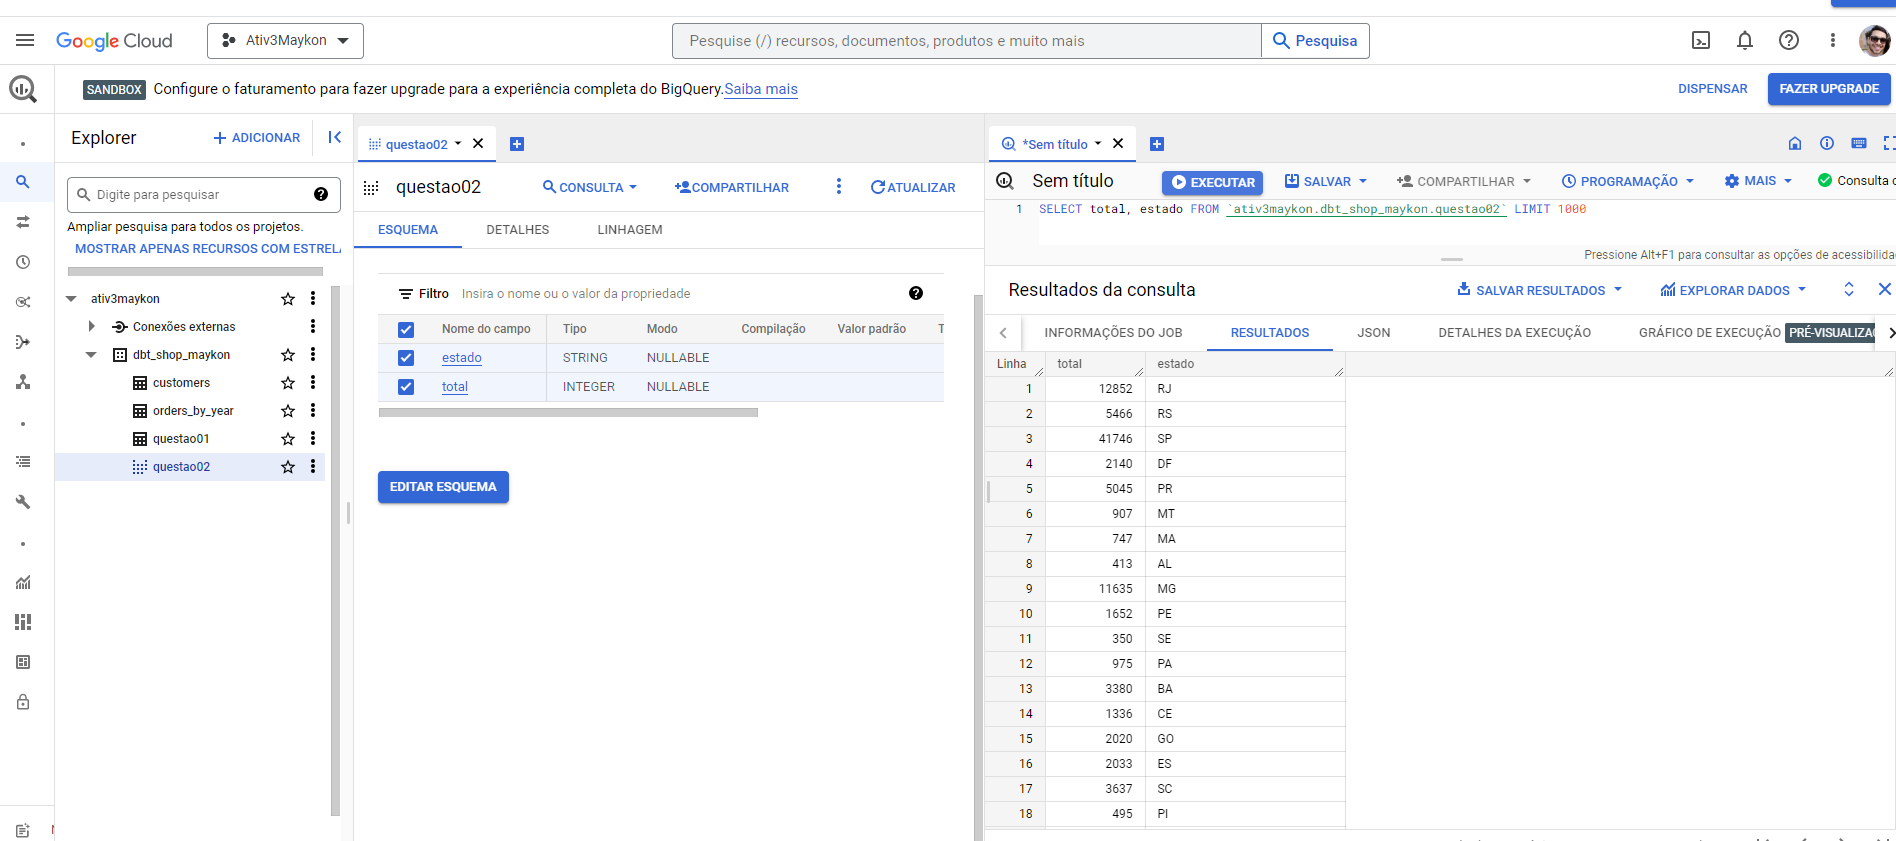

3. De acordo com o resultado do exercício 2 retorne apenas os estados que tem mais de 5000 pedidos, esse número deve ser passado via variável `number_of_orders` do `dbt`.

```sql

{{ config(materialized='view') }}

SELECT
    *
FROM 
    `dbt_shop_maykon.questao02`  as q2
WHERE 
     total >= {{ var("number_of_orders") }}
ORDER BY
    1

```

``dbt run --models shop.questao03 --vars "{'number_of_orders':'5000'}"``

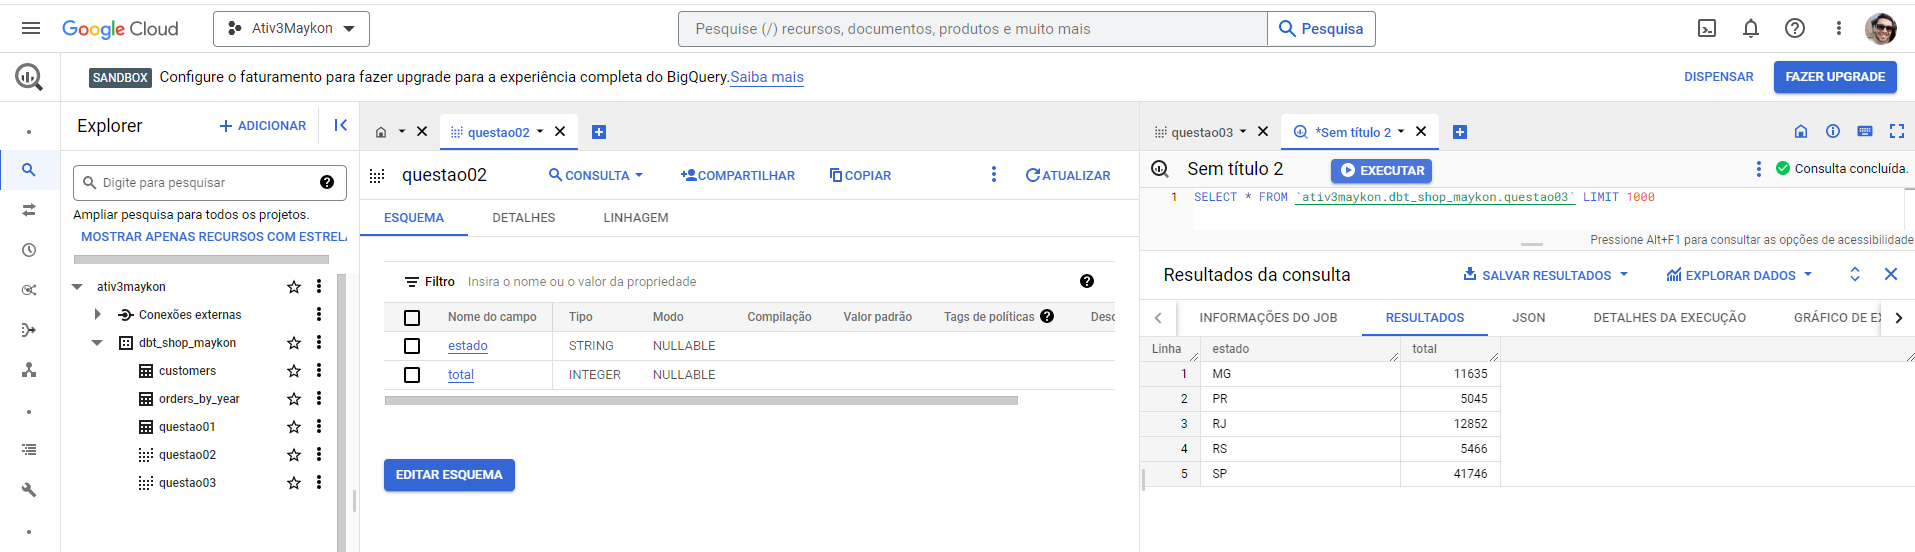

4. Crie uma `view` chamada `customers_by_region` que utiliza os dados da tabela `customers`. A visão deve realizar uma agregação por região do Brasil (Norte, Nordeste, Sudeste, Centro Oeste e Sul) e contar o número de clientes em cada uma delas.

```sql

{{ config(materialized='view') }}

SELECT
CASE
    WHEN customer_state IN ("AC","AM","AP","PA","RO","RR","TO") THEN "Norte"
    WHEN customer_state IN ("AL","BA","CE","MA","PB","PE","PI","RN","SE") THEN "Nordeste"
    WHEN customer_state IN ("ES","MG","RJ","SP") THEN "Sudeste"
    WHEN customer_state IN ("DF","GO","MS","MT") THEN "Centro-Oeste"
    WHEN customer_state IN ("PR","RS","SC") THEN "Sul"
END
    as region,
    count (customer_id) as num_clientes
FROM 
    `dbt_shop_maykon.customers`  as q4  
GROUP BY
    region   

```

``dbt run --models shop.customers_by_region``

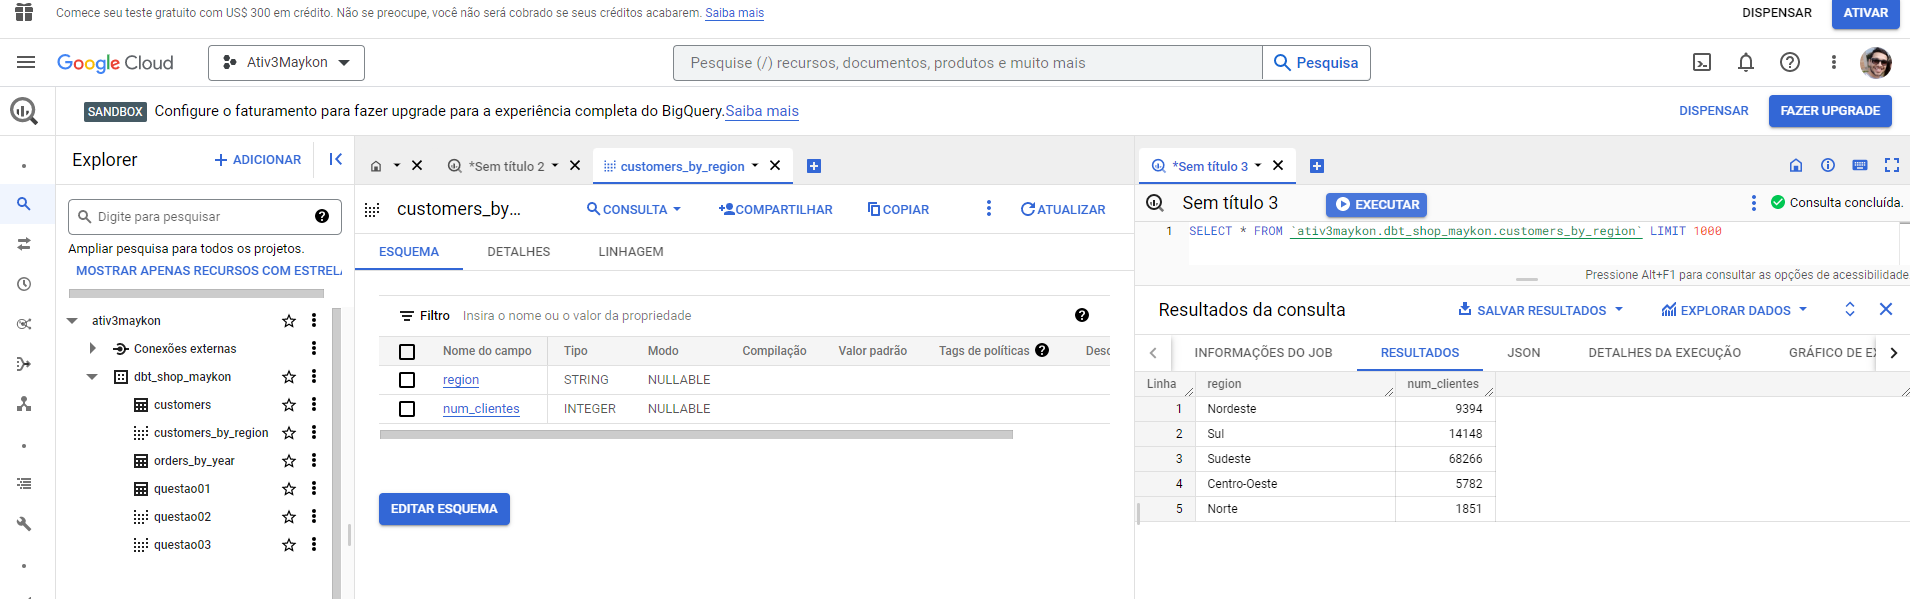

5. Crie uma tabela `items_costs` que contenha o preço total de um item (soma do valor do produto com o frete).

```sql

{{ config(materialized='table') }}

SELECT
    order_id,
    order_item_id,
    product_id,
    seller_id,
    shipping_limit_date,
    price,
    freight_value,
    price + freight_value as custo_total
FROM 
    `dbt_shop_maykon.items`

```

``dbt run --models shop.items_costs``

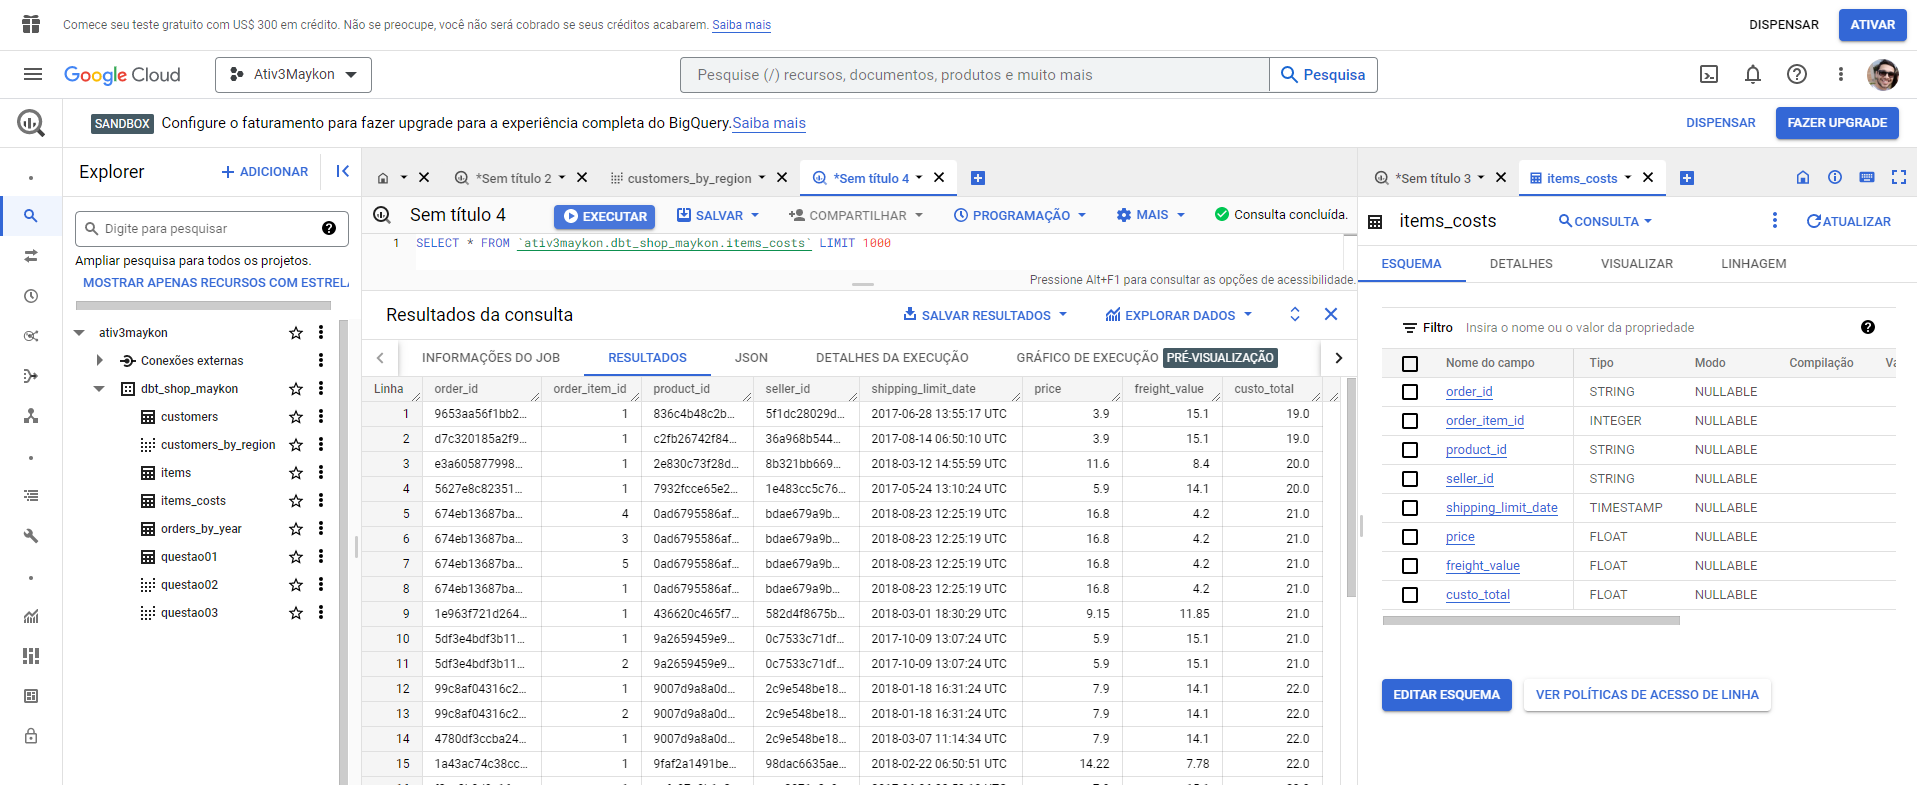

6. Crie uma `view` com o nome `orders_shipped_costs`, você deve calcular o preço total do pedido somado com o frete, apenas para pedidos enviado (shipped).

```sql

{{ config(materialized='table') }}

SELECT
    items.order_id,
    items.order_item_id,
    items.product_id,
    items.seller_id,
    items.shipping_limit_date,
    items.freight_value,
    price,
    price + freight_value as custo_total
FROM
    `dbt_shop_maykon.orders_by_year` as orders_by_year
INNER JOIN 
    `dbt_shop_maykon.items` as items 
ON
    orders_by_year.order_id = items.order_id
WHERE 
    orders_by_year.order_status = "shipped"

```

``dbt run --models shop.orders_shipped_costs``

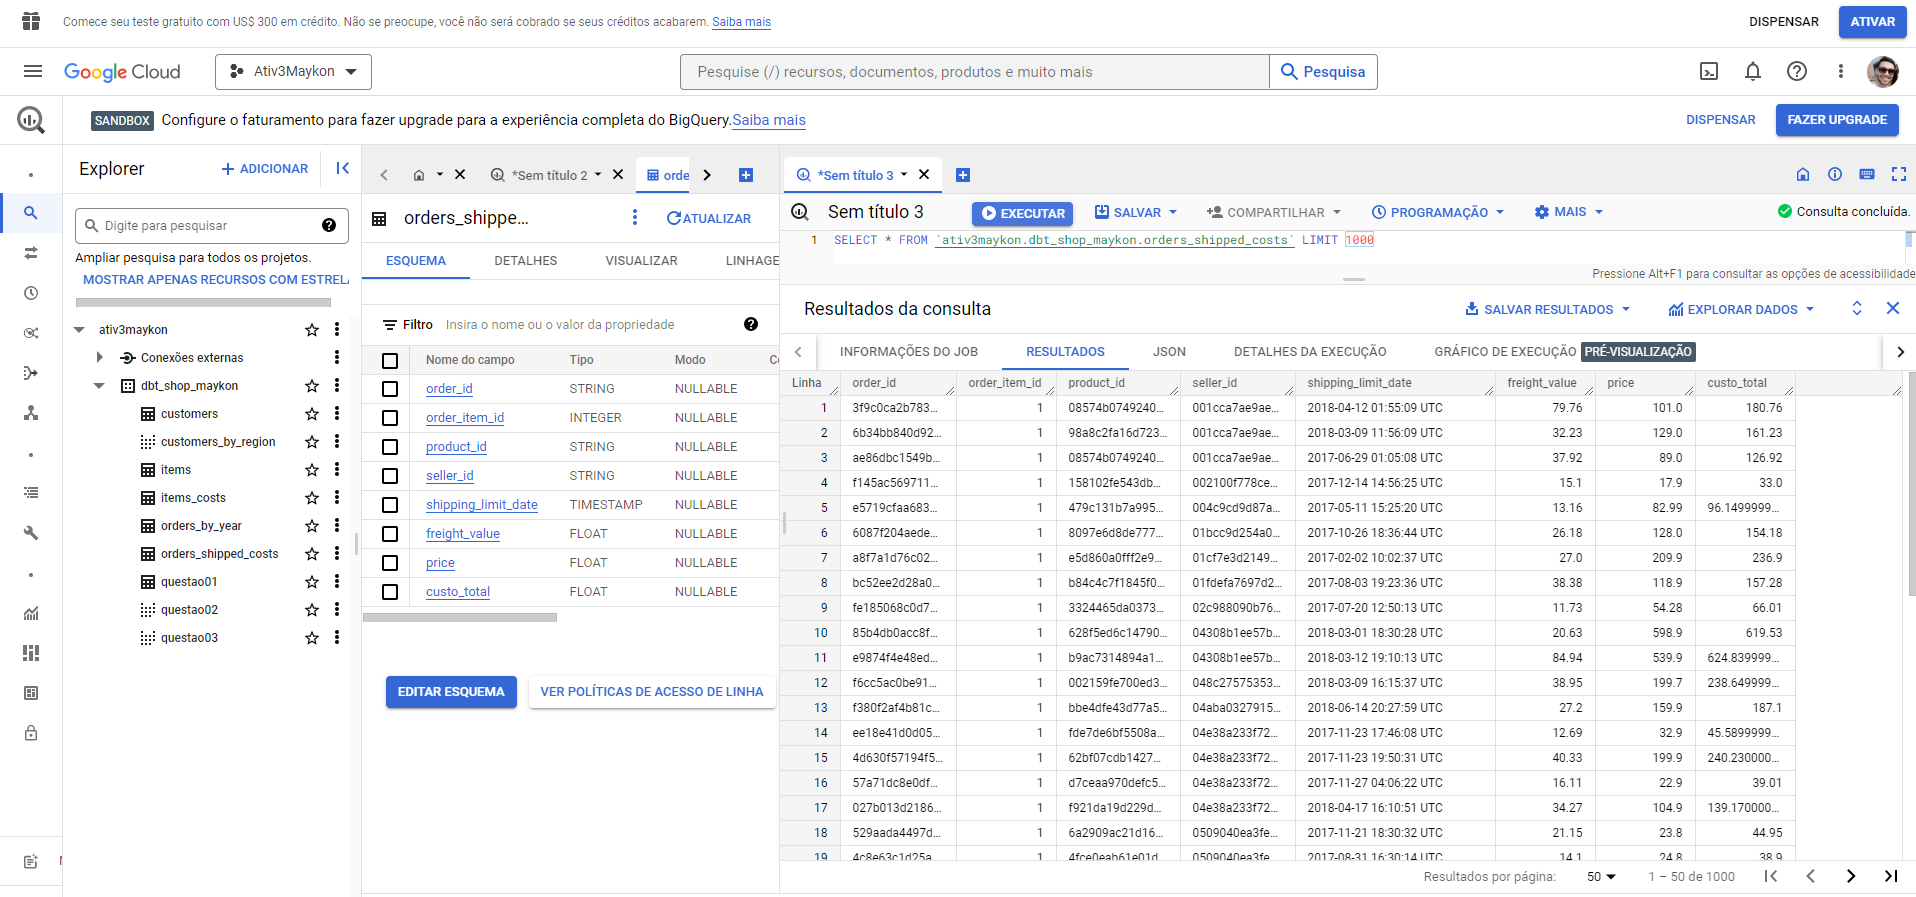